In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

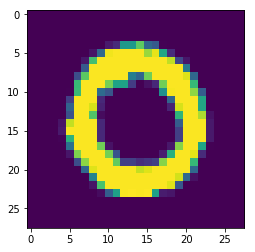

In [45]:
#read in data using panda, assign training data and plot.
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")
#print(training_data.head())

image = training_data.iloc[1, 1:]
image = np.array(image).reshape((28, 28))
plt.imshow(image)

testing_data = training_data.iloc[0:21000, :]
training_data = training_data.iloc[21000:, :]

In [46]:
#assign answers unique ids
def getIds(labels):
    classes = labels
    uniques = np.unique(classes)
    ids = np.zeros((len(classes), len(uniques)))
    for i, types in enumerate (uniques):
        id = np.zeros(len(uniques))
        id[i] = 1
        ids[classes == types] = id
        
    return ids

ids = getIds(training_data["label"])
ids_test = getIds(testing_data["label"])

In [47]:
#Normalizes the data (makes it between 0 and 1)
def normalize (a):
    maxi = np.max(a)
    mini = np.min(a)
    return (a - mini) / (maxi - mini)

In [48]:
#Figure out what this does
def softmax (x):
    e_x = np.exp(x - np.max(x))
    summations = np.sum(e_x, axis = 1)
    summations = summations.reshape(len(summations), 1)
    return e_x / summations

In [49]:
#Create variables to be used later

#The various pixels
features = training_data.iloc[:,1:]
features_test = testing_data.iloc[:,1:]

#The training data
train_x = np.array(features)
train_x = normalize(train_x)
constants = np.ones(train_x.shape[0]).reshape(-1, 1)
train_x = np.hstack((train_x, constants)) 

test_x = np.array(features_test)
test_x = normalize(test_x)
constants = np.ones(test_x.shape[0]).reshape(-1, 1)
test_x = np.hstack((test_x, constants)) 
#ids
train_y = ids
test_y = ids_test
print ("train_y shape " + str(train_y.shape))
print ("train_x shape " + str(train_x.shape))
print ("features shape " + str(features.shape))

train_y shape (21000, 10)
train_x shape (21000, 785)
features shape (21000, 784)


In [51]:
#Main method

#Weights for each variable for each unique id
weights = np.ones((train_x.shape[1], len(uniques)))
#Number of times to run
epochs = 50

#Amount to increase the step during each loop
learning_rate = .2

for i in range(epochs):
    hypothesis = np.matmul(train_x, weights)
    hypothesis = softmax(hypothesis)
    errorish = hypothesis - train_y
    gradients = np.matmul(np.transpose(train_x), errorish) / train_x.shape[0]
    
    delta = gradients * learning_rate
    weights = weights - delta
    
    error = (np.sum(errorish ** 2) / errorish.shape[0])
    
    if (i % 500):
        print (i, error)
    
print (weights)

hypothesis = np.matmul(train_x, weights)
hypothesis = softmax(hypothesis)

errorish = hypothesis - train_y
error = (np.sum(errorish ** 2) / errorish.shape[0])

print(error)
print (hypothesis)



1 0.8529112991476676
2 0.8048586251623719
3 0.7575362966178553
4 0.7126678766674969
5 0.6712143881686823
6 0.6335795414271315
7 0.5997906351821626
8 0.5696400058930984
9 0.542799054183798
10 0.5188980234764695
11 0.4975731328117622
12 0.4784899407569939
13 0.4613521754612439
14 0.44590273746070824
15 0.43192098655269207
16 0.41921858785654537
17 0.40763507775972635
18 0.3970336887715681
19 0.3872976453349464
20 0.3783269800910579
21 0.3700358452430595
22 0.3623502638656552
23 0.3552062583594753
24 0.3485482957824341
25 0.3423279964197014
26 0.33650305969866745
27 0.33103636904317196
28 0.32589524393514174
29 0.3210508131536343
30 0.3164774879173866
31 0.31215251756906537
32 0.3080556136312342
33 0.3041686306567339
34 0.30047529439782295
35 0.2969609695213309
36 0.29361246047775025
37 0.29041784025317335
38 0.28736630264485113
39 0.284448034444608
40 0.28165410452200046
41 0.27897636729710923
42 0.2764073785021193
43 0.2739403214681247
44 0.2715689424523905
45 0.2692874937523632
46 0.26

0.8611904761904762


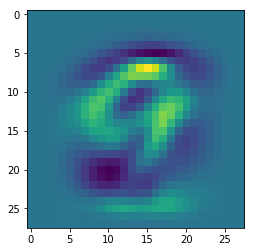

In [52]:
hypothesis = np.matmul(test_x, weights)
hypothesis = softmax(hypothesis)

errorish = hypothesis - test_y
error = (np.sum(errorish ** 2) / errorish.shape[0])

hypothesis_classes = (np.argmax(hypothesis, axis=1))
true_classes = np.argmax(test_y, axis=1)

plt.imshow (weights[:-1, 9].reshape((28,28)))

print ( len(np.where(hypothesis_classes == true_classes)[0]) / len(train_y) )